In [ ]:
# put all import statements here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.preprocessing import PolynomialFeatures

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score

from catboost import CatBoostRegressor
from skopt import BayesSearchCV

# Setting up the data

(run these cells first)

In [ ]:
# I put the diamonds.csv set in our Github
from google.colab import files
uploaded = files.upload()

import io
diamonds = pd.read_csv(io.BytesIO(uploaded['diamonds.csv']))

Saving diamonds.csv to diamonds.csv


In [ ]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [ ]:
diamonds = diamonds.drop(columns=["Unnamed: 0"])

In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


# 3.1.1 Handling Categorical Features

Categorical Features:

Assign scalar: (1 being worst and higher # being the best)

*   cut
*   color
*   clarity

Intuition: clearer diamonds, better cut, and better color diamonds will command a higher price.




In [ ]:
diamonds['cut'] = diamonds['cut'].replace(['Fair','Good','Very Good','Premium','Ideal'],[1,2,3,4,5])
diamonds['color'] = diamonds['color'].replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
diamonds['clarity'] = diamonds['clarity'].replace(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],[1,2,3,4,5,6,7,8])

In [ ]:
diamonds.dropna()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,327,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,328,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,337,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,338,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2758,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2759,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2760,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
#depth = []
#for i in range(diamonds.shape[0]):
#  print('---',i)
#  z = diamonds['z'][i]
#  x = diamonds['x'][i]
#  y = diamonds['y'][i]
  #print('z: ', z)
  #print('x: ', x)
  #rint('y: ', y)
#  depth.append(2*z/(x+y))

Note: Sarah, I dont know why, but the code was not running without the print satements. It kept getting this runtime error without them. After I put the print statements it was able to make the depth list. Jk do not run the previous cell because depth is already there it was not showing up initially

In [ ]:
#diamonds['depth'] = depth
#diamonds.head()

#3.1.2 Data Inspection

## Question 1.1

In [ ]:
# plot a heatmap of the pearson corerlation matrix of the dataset columns

# which features have the higest absolute correlation with the price (target variable)

pear_corr=diamonds.corr(method='pearson')
pear_corr

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053493,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172509,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146802,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010648,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053493,-0.172509,-0.146802,-0.010648,0.127134,1.000000,0.884436,0.865422,0.861250
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884436,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865422,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861250,0.970772,0.952006,1.000000


<AxesSubplot:>

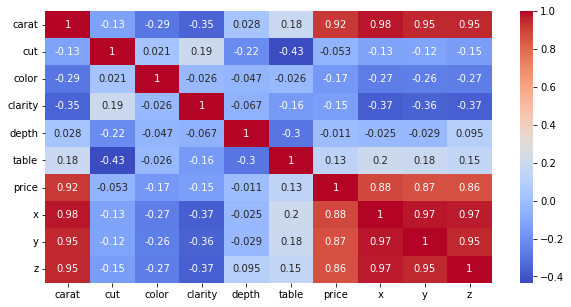

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(pear_corr,annot = True, cmap='coolwarm')

## Question 1.2

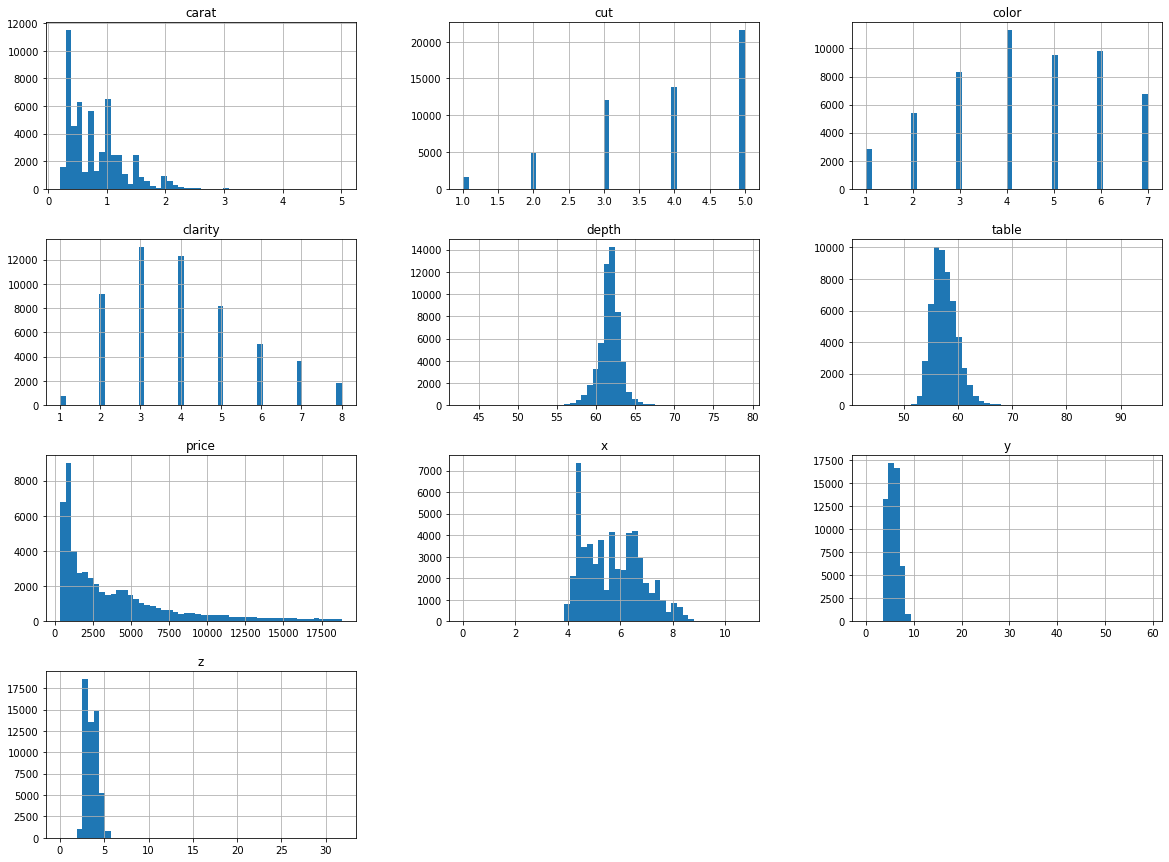

In [ ]:
diamonds.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
# calculate skew and sort by skew
skew_feats=diamonds.skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_feats})

In [ ]:
skewness

,Skew
y,2.434167
price,1.618388
z,1.522423
carat,1.116646
table,0.796896
clarity,0.551438
x,0.378676
depth,-0.082294
color,-0.189366
cut,-0.717180


## Question 1.3

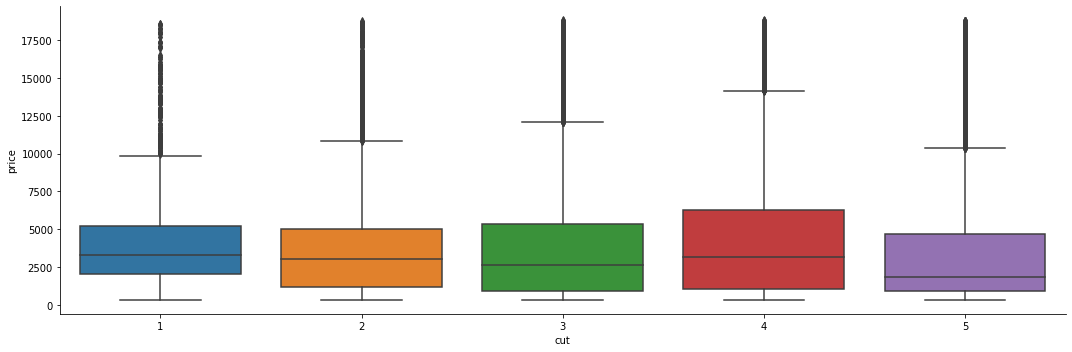

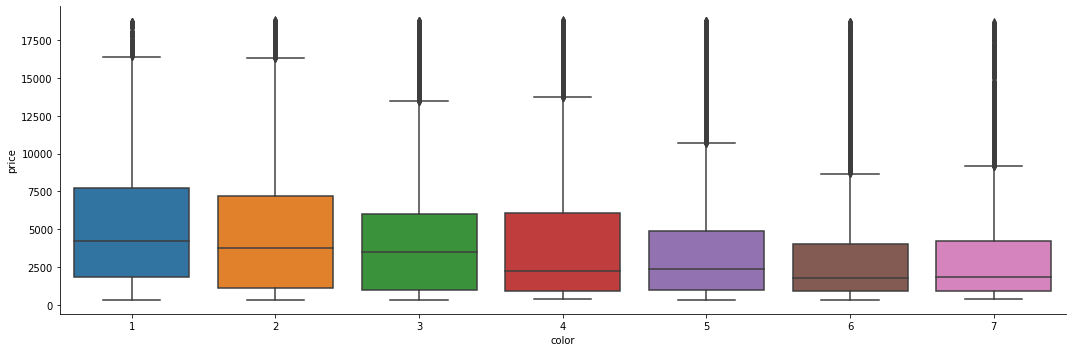

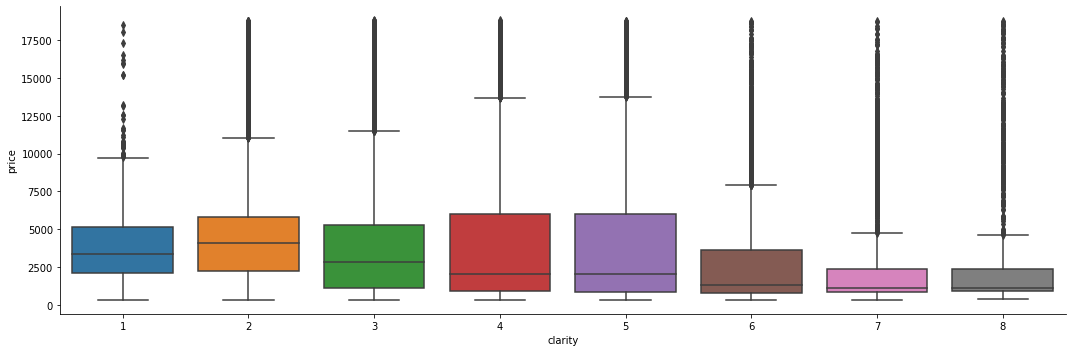

In [ ]:
cat_columns = ['cut', 'color', 'clarity']
for col in cat_columns:
  sns.catplot(x=col, y='price', kind="box", dodge=False, height = 5, aspect = 3,data=diamonds)

## Question 1.4

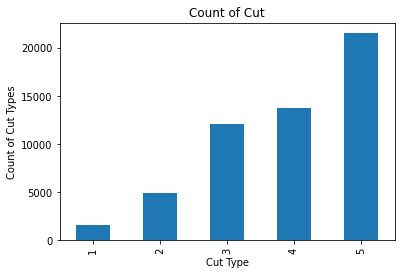

In [ ]:
diamonds.cut.value_counts().sort_index().plot(kind = 'bar')
plt.title("Count of Cut")
plt.xlabel("Cut Type")
plt.ylabel("Count of Cut Types")
plt.show()

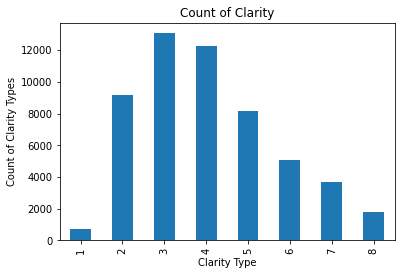

In [ ]:
diamonds.clarity.value_counts().sort_index().plot(kind = 'bar')
plt.title("Count of Clarity")
plt.xlabel("Clarity Type")
plt.ylabel("Count of Clarity Types")
plt.show()

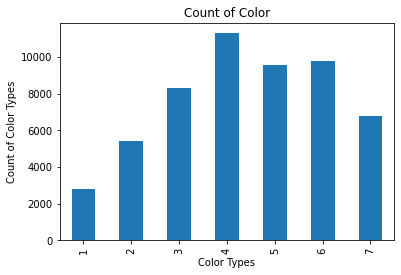

In [ ]:
diamonds.color.value_counts().sort_index().plot(kind = 'bar')
plt.title("Count of Color")
plt.xlabel("Color Types")
plt.ylabel("Count of Color Types")
plt.show()

# 3.1.3 Standardization

## Question 2.1

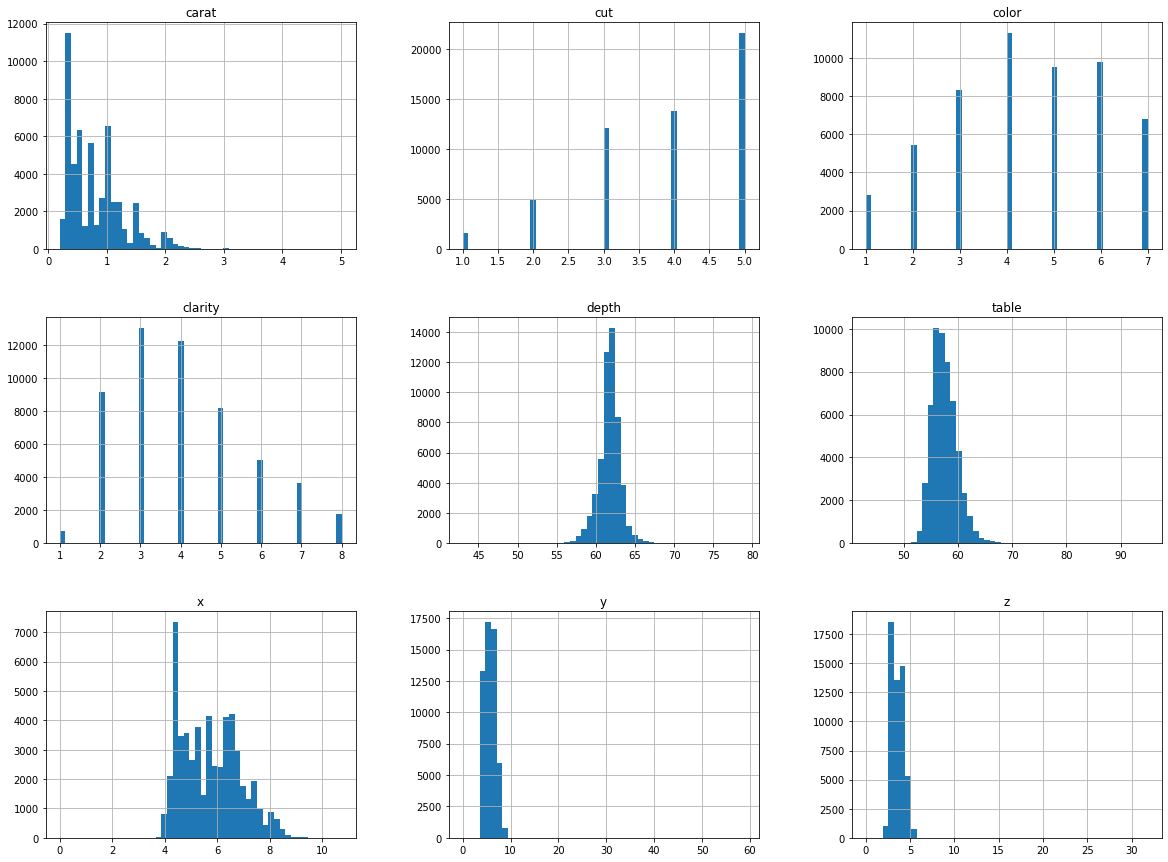

In [ ]:
diamonds.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
price = diamonds['price'] # don't standardize price
diamonds = diamonds.drop(columns=['price'])

In [ ]:
scaler = StandardScaler()
diamondsScaled = pd.DataFrame(scaler.fit_transform(diamonds, price), columns=diamonds.columns, index=diamonds.index)

In [ ]:
diamonds['cut'].mean()

3.904097144975899

In [ ]:
diamondsScaled['cut'].mean()

1.4542810164611617e-16

In [ ]:
diamonds['cut'].var()

1.2467953527310542

In [ ]:
diamondsScaled['cut'].var()

1.0000185394612433

In [ ]:
#diamonds = diamonds.to_numpy()
#type(diamonds)

In [ ]:
#diamonds_train, diamonds_test = train_test_split(diamonds, test_size=0.3, random_state=42)

#diamonds_y_train = diamonds_train[:,6]
#diamonds_x_train = np.delete(diamonds_train, 6, 1)

#diamonds_y_test = diamonds_test[:,6]
#diamonds_x_test = np.delete(diamonds_test, 6, 1)

In [ ]:
#scaler = StandardScaler()
#diamonds_x_train = scaler.fit_transform(diamonds_x_train)
#diamonds_x_test = scaler.transform(diamonds_x_test)

# 3.1.4 Feature Selection

## Question 2.2

In [ ]:
diamondsScaled.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.198168,0.981473,0.937163,-1.245215,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,0.085889,0.937163,-0.638095,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.705279,0.937163,0.576145,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,0.085889,-1.414272,-0.030975,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.705279,-2.002131,-1.245215,1.082358,0.242928,-1.240167,-1.212238,-1.117674


In [ ]:
diamonds_mi = mutual_info_regression(diamondsScaled, price)
diamonds_mi

array([1.65249159, 0.05680802, 0.13657897, 0.21536348, 0.03133825,
       0.03439326, 1.41316817, 1.421656  , 1.36041602])

In [ ]:
diamonds_f_reg, diamonds_p_values = f_regression(diamondsScaled,price)

In [ ]:
diamonds_f_reg

array([3.04051487e+05, 1.54784468e+02, 1.65440124e+03, 1.18800706e+03,
       6.11586346e+00, 8.86119363e+02, 1.93741523e+05, 1.60915662e+05,
       1.54923267e+05])

Looking at the pearson correlation and mutual info. The features that relate most to price is the following features: carat, x, y, and z. The others dont really provide much info. Gonna drop color, clarity, depth and table for now


Update (03/09/2023) Talking with the TA, we dont have to drop rows, its only if we want to.

In [ ]:
#diamonds_x_train = np.delete(diamonds_x_train,[1, 2, 3, 4, 5],1)
#diamonds_x_test = np.delete(diamonds_x_test,[1, 2, 3, 4, 5],1)
#diamonds_x_train.shape

# 3.3 Training + Evaluation

In [ ]:
# compare performance using average RMSE from 10-fold cross validation

In [ ]:
price = diamonds['price'] # don't standardize price
diamonds = diamonds.drop(columns=['price'])

In [ ]:
def cv_rsme(model, X, y):
  kf = KFold(n_splits = 10)
  rmse_train = []
  rmse_test = []
  
  for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train, y_train)
    X_test = scaler.transform(X_test)

    reg = model.fit(X_train, y_train)

    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)

    rmse_train.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_test.append(sqrt(mean_squared_error(y_test, y_pred_test)))
  return np.average(rmse_train), np.average(rmse_test)

In [ ]:
diamonds = diamonds.to_numpy()
price = price.to_numpy()

Note for Sarah: When I trying to get the metrics using cross_validate. It gives neagitive values. So I had to multiply by -1. 

Links I looked at:

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


Question: Can we use libraries for this? I am assuming we can right. Like Polynomial Regression explicitly mentions it. But we have always been allowed to use libraries

# 3.3.1 Linear Regression

## (a) Ordinary Least Squares (linear regression without regularization)

In [ ]:
OLS = LinearRegression()
ols_train_rsme, ols_test_rsme = cv_rsme(OLS, diamonds, price)

In [ ]:
print('Avg Train OLS RMSE: ', ols_train_rsme)
print('Avg Test OLS RMSE: ', ols_test_rsme)

Avg Train OLS RMSE:  1206.2805967946167
Avg Test OLS RMSE:  1205.045050850989


In [ ]:
# p-value
import pandas as pd , numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma

In [ ]:
X=diamonds
y=price
X2=sma.add_constant(X)

In [ ]:
est  = sma.OLS(y, X2)
est2  = est.fit()

In [ ]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 5.845e+04
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:29:22   Log-Likelihood:            -4.5972e+05
No. Observations:               53940   AIC:                         9.195e+05
Df Residuals:                   53930   BIC:                         9.195e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2783.6213    428.811      6.491      0.0

In [ ]:
#OLS = LinearRegression()
#ols_scores = cross_validate(OLS, diamonds_x_train, diamonds_y_train, cv=10, scoring = ['neg_root_mean_squared_error'])
#ols_avg_rsme = ols_scores['test_neg_root_mean_squared_error']
#print('Avg Train OLS RMSE: ', (ols_avg_rsme.mean()*-1))

In [ ]:
#ols_scores = cross_validate(OLS, diamonds_x_test, diamonds_y_test, cv=10, scoring = ['neg_root_mean_squared_error'])
#ols_avg_rsme = (ols_scores['test_neg_root_mean_squared_error'])
#print('Avg Train OLS RMSE: ', (ols_avg_rsme.mean()*-1))

## (b) Lasso

In [ ]:
alpha_values = np.arange(0.01,2,0.05)

In [ ]:
lasso_train_rmse = []
lasso_test_rmse = []

for alpha in alpha_values:
  print(alpha)
  lasso = Lasso(alpha=alpha)
  train_rmse, test_rmse = cv_rsme(lasso, diamonds, price)
  lasso_train_rmse.append(train_rmse)
  lasso_test_rmse.append(test_rmse)

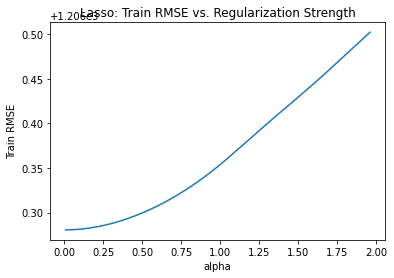

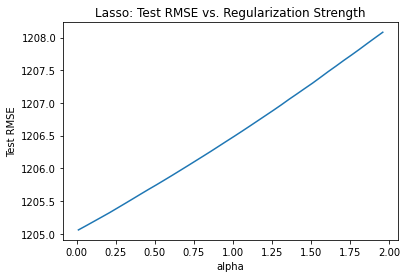

In [ ]:
plt.plot(alpha_values, lasso_train_rmse)
plt.xlabel("alpha")
plt.ylabel("Train RMSE")
plt.title("Lasso: Train RMSE vs. Regularization Strength")
plt.show()

plt.plot(alpha_values, lasso_test_rmse)
plt.xlabel("alpha")
plt.ylabel("Test RMSE")
plt.title("Lasso: Test RMSE vs. Regularization Strength")
plt.show()

In [ ]:
lasso = Lasso(alpha=0.05)
lasso_train_rsme, lasso_test_rsme = cv_rsme(lasso, diamonds, price)
print('Avg Train Lasso RMSE: ', lasso_train_rsme)
print('Avg Test Lasso RMSE: ', lasso_test_rsme)

Avg Train Lasso RMSE:  1206.2807904295664
Avg Test Lasso RMSE:  1205.1091902930993


In [ ]:
#lasso = Lasso(alpha=0.15)
#lasso_scores = cross_validate(lasso,diamonds_x_train, diamonds_y_train, cv=10, scoring = ['neg_root_mean_squared_error'])
#lasso_avg_rsme = (lasso_scores['test_neg_root_mean_squared_error'])
#print('Avg Lasso RMSE: ', lasso_avg_rsme.mean()*-1)

In [ ]:
#lasso = Lasso(alpha=0.15)
#lasso_scores = cross_validate(lasso,diamonds_x_test, diamonds_y_test, cv=10, scoring = ['neg_root_mean_squared_error'])
#lasso_avg_rsme = (lasso_scores['test_neg_root_mean_squared_error'])
#print('Avg Lasso RMSE: ', lasso_avg_rsme.mean()*-1)

## (c) Ridge Regresion

In [ ]:
ridge_train_rmse = []
ridge_test_rmse = []

for alpha in alpha_values:
  print(alpha)
  ridge = Ridge(alpha=alpha)
  train_rmse, test_rmse = cv_rsme(ridge, diamonds, price)
  ridge_train_rmse.append(train_rmse)
  ridge_test_rmse.append(test_rmse)

0.01
0.060000000000000005
0.11
0.16000000000000003
0.21000000000000002
0.26
0.31000000000000005
0.36000000000000004
0.41000000000000003
0.46
0.51
0.56
0.6100000000000001
0.66
0.7100000000000001
0.76
0.81
0.8600000000000001
0.91
0.9600000000000001
1.01
1.06
1.11
1.1600000000000001
1.2100000000000002
1.26
1.31
1.36
1.4100000000000001
1.4600000000000002
1.51
1.56
1.61
1.6600000000000001
1.7100000000000002
1.76
1.81
1.86
1.9100000000000001
1.9600000000000002


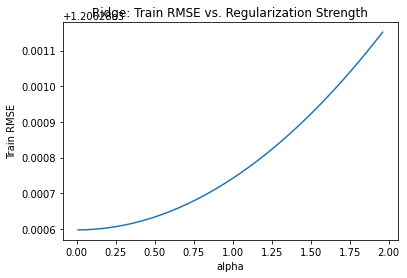

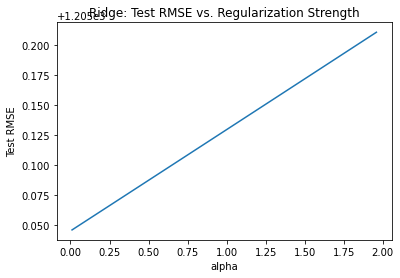

In [ ]:
plt.plot(alpha_values, ridge_train_rmse)
plt.xlabel("alpha")
plt.ylabel("Train RMSE")
plt.title("Ridge: Train RMSE vs. Regularization Strength")
plt.show()

plt.plot(alpha_values, ridge_test_rmse)
plt.xlabel("alpha")
plt.ylabel("Test RMSE")
plt.title("Ridge: Test RMSE vs. Regularization Strength")
plt.show()

In [ ]:
ridge = Ridge(alpha=0.05)
ridge_train_rsme, ridge_test_rsme = cv_rsme(ridge, diamonds, price)
print('Avg Train Ridge RMSE: ', ridge_train_rsme)
print('Avg Test Ridge RMSE: ', ridge_test_rsme)

Avg Train Ridge RMSE:  1206.280597157293
Avg Test Ridge RMSE:  1205.0492630689291


In [ ]:
#ridge = Ridge(alpha=0.15)
#ridge_scores = cross_validate(ridge, diamonds_x_train, diamonds_y_train, cv=10, scoring = ['neg_root_mean_squared_error'])
#ridge_avg_rsme = (lasso_scores['test_neg_root_mean_squared_error'])
#print('Avg Ridge Regression RMSE: ', ridge_avg_rsme.mean()*-1)

In [ ]:
#ridge = Ridge(alpha=0.15)
#ridge_scores = cross_validate(ridge, diamonds_x_test, diamonds_y_test, cv=10, scoring = ['neg_root_mean_squared_error'])
#ridge_avg_rsme = (lasso_scores['test_neg_root_mean_squared_error'])
#print('Avg Ridge Regression RMSE: ', ridge_avg_rsme.mean()*-1)

# 3.3.2 Polynomial Regression

In [ ]:
train_rmse = []
test_rmse = []
for i in range(2,6):
  print(f'---Degree: {i}')
  poly = PolynomialFeatures(i)
  diamonds_poly = poly.fit_transform(diamonds)
  ridge_poly = Ridge(alpha = 1)
  deg_ridge_train_rsme, deg_ridge_test_rsme = cv_rsme(ridge, diamonds_poly, price)
  train_rmse.append(deg_ridge_train_rsme)
  test_rmse.append(deg_ridge_test_rsme)
  print(f'Avg Train Ridge RMSE (Degree: {i}): ', deg_ridge_train_rsme)
  print(f'Avg Test Ridge RMSE (Degree: {i}): ', deg_ridge_test_rsme)

---Degree: 2
Avg Train Ridge RMSE (Degree: 2):  755.6745258515463
Avg Test Ridge RMSE (Degree: 2):  1767.506593568652
---Degree: 3
Avg Train Ridge RMSE (Degree: 3):  603.9229569866088
Avg Test Ridge RMSE (Degree: 3):  5098.175122481951
---Degree: 4
Avg Train Ridge RMSE (Degree: 4):  572.5232402494901
Avg Test Ridge RMSE (Degree: 4):  43699.08000837405
---Degree: 5
Avg Train Ridge RMSE (Degree: 5):  549.2852625129897
Avg Test Ridge RMSE (Degree: 5):  246182.02574823238


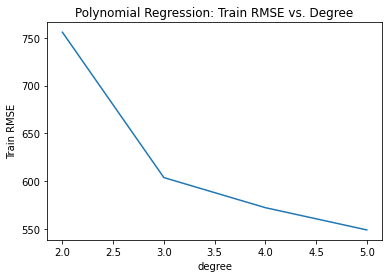

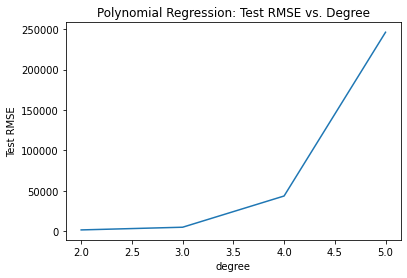

In [ ]:
degree = range(2,6)
plt.plot(degree, train_rmse)
plt.xlabel("degree")
plt.ylabel("Train RMSE")
plt.title("Polynomial Regression: Train RMSE vs. Degree")
plt.show()

plt.plot(degree, test_rmse)
plt.xlabel("degree")
plt.ylabel("Test RMSE")
plt.title("Polynomial Regression: Test RMSE vs. Degree")
plt.show()

In [ ]:
#poly = PolynomialFeatures(2)
#diamonds_poly_x_train = poly.fit_transform(diamonds_x_train)
#diamonds_poly_x_test = poly.transform(diamonds_x_test)

In [ ]:
#ridge_poly = Ridge(alpha=1.0)
#ridge_poly_scores = cross_validate(ridge_poly, diamonds_poly_x_train, diamonds_y_train, cv=10, scoring = ['neg_root_mean_squared_error'])
#ridge_poly_avg_rsme = (ridge_poly_scores['test_neg_root_mean_squared_error'])
#print('Avg Ridge Regression RMSE: ', ridge_poly_avg_rsme.mean()*-1)

In [ ]:
#ridge_poly_scores = cross_validate(ridge_poly, diamonds_poly_x_test, diamonds_y_test, cv=10, scoring = ['neg_root_mean_squared_error'])
#ridge_poly_avg_rsme = (ridge_poly_scores['test_neg_root_mean_squared_error'])
#print('Avg Ridge Regression RMSE: ', ridge_poly_avg_rsme.mean()*-1)

# 3.3.3 Neural Network

For the MLP model, I dont know how to change hidden nueorn feautres. Maybe there is another library or a different feature for neurons but I dont see it 

Link I am looking at:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [ ]:
param_list = {"hidden_layer_sizes": [(1,1),(1,10),(50,1),(50,5),(50,10)], "activation": ["logistic", "relu"], "alpha": [0.00005, 0.1, 0.5]}

In [ ]:
scaler=StandardScaler()
X = scaler.fit_transform(diamonds, price)
MLP_gridCV = GridSearchCV(estimator=MLPRegressor(), param_grid=param_list, cv=3, scoring = 'neg_root_mean_squared_error', verbose=10, return_train_score=True)
MLP_gridCV.fit(X, price)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 1/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 1);, score=(train=-6014.714, test=-4490.291) total time=  10.1s
[CV 2/3; 1/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 1/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 1);, score=(train=-3370.949, test=-8352.245) total time=   9.4s
[CV 3/3; 1/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 1/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 1);, score=(train=-6705.215, test=-1604.893) total time=   9.9s
[CV 1/3; 2/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 2/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 10);, score=(train=-5819.778, test=-4191.130) total time=  11.1s
[CV 2/3; 2/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 2/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 10);, score=(train=-3104.098, test=-8123.798) total time=  11.1s
[CV 3/3; 2/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 2/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(1, 10);, score=(train=-6464.221, test=-1312.285) total time=  11.3s
[CV 1/3; 3/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 3/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 1);, score=(train=-6014.160, test=-4489.459) total time=  34.6s
[CV 2/3; 3/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 3/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 1);, score=(train=-3372.226, test=-8353.332) total time=  27.2s
[CV 3/3; 3/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 3/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 1);, score=(train=-6732.960, test=-1638.798) total time=  29.3s
[CV 1/3; 4/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 5)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 4/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 5);, score=(train=-5926.443, test=-4356.529) total time=  17.6s
[CV 2/3; 4/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 5)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 4/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 5);, score=(train=-3275.834, test=-8271.110) total time=  18.4s
[CV 3/3; 4/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 5)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 4/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 5);, score=(train=-6613.052, test=-1492.465) total time=  17.6s
[CV 1/3; 5/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 5/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 10);, score=(train=-5838.882, test=-4221.080) total time=  22.1s
[CV 2/3; 5/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 5/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 10);, score=(train=-3131.953, test=-8147.780) total time=  20.9s
[CV 3/3; 5/30] START activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 5/30] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(50, 10);, score=(train=-6478.876, test=-1329.908) total time=  19.3s
[CV 1/3; 6/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1)..


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 6/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1);, score=(train=-6015.172, test=-4490.978) total time=  11.1s
[CV 2/3; 6/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1)..


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 6/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1);, score=(train=-3370.939, test=-8352.236) total time=  11.9s
[CV 3/3; 6/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1)..


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 6/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1);, score=(train=-6704.711, test=-1604.277) total time=  12.8s
[CV 1/3; 7/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 10).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 7/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 10);, score=(train=-5819.653, test=-4190.934) total time=  12.2s
[CV 2/3; 7/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 10).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 7/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 10);, score=(train=-3104.207, test=-8123.892) total time=  12.0s
[CV 3/3; 7/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 10).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 7/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 10);, score=(train=-6463.546, test=-1311.473) total time=  11.8s
[CV 1/3; 8/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 1).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 8/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 1);, score=(train=-6013.664, test=-4488.715) total time=  31.6s
[CV 2/3; 8/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 1).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 8/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 1);, score=(train=-3383.650, test=-8363.061) total time=  27.5s
[CV 3/3; 8/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 1).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 8/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 1);, score=(train=-6705.405, test=-1605.125) total time=  29.0s
[CV 1/3; 9/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 5).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 9/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 5);, score=(train=-5926.895, test=-4357.221) total time=  17.7s
[CV 2/3; 9/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 5).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 9/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 5);, score=(train=-3251.158, test=-8250.016) total time=  18.1s
[CV 3/3; 9/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 5).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 9/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 5);, score=(train=-6605.743, test=-1483.568) total time=  17.6s
[CV 1/3; 10/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 10/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 10);, score=(train=-5836.425, test=-4217.236) total time=  18.9s
[CV 2/3; 10/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 10/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 10);, score=(train=-3148.507, test=-8162.015) total time=  18.8s
[CV 3/3; 10/30] START activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 10/30] END activation=logistic, alpha=0.1, hidden_layer_sizes=(50, 10);, score=(train=-6482.389, test=-1334.137) total time=  19.0s
[CV 1/3; 11/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(1, 1).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 11/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(1, 1);, score=(train=-6014.290, test=-4489.654) total time=  10.0s
[CV 2/3; 11/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(1, 1).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 11/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(1, 1);, score=(train=-3371.359, test=-8352.594) total time=  10.1s
[CV 3/3; 11/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(1, 1).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 11/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(1, 1);, score=(train=-6706.164, test=-1606.053) total time=  10.0s
[CV 1/3; 12/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(1, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 12/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(1, 10);, score=(train=-5819.443, test=-4190.603) total time=  10.9s
[CV 2/3; 12/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(1, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 12/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(1, 10);, score=(train=-3103.825, test=-8123.563) total time=  10.9s
[CV 3/3; 12/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(1, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 12/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(1, 10);, score=(train=-6463.517, test=-1311.438) total time=  11.1s
[CV 1/3; 13/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 13/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 1);, score=(train=-6014.494, test=-4489.961) total time=  27.5s
[CV 2/3; 13/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 13/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 1);, score=(train=-3372.340, test=-8353.430) total time=  27.8s
[CV 3/3; 13/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 13/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 1);, score=(train=-6706.430, test=-1606.377) total time=  26.6s
[CV 1/3; 14/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 5)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 14/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 5);, score=(train=-5950.442, test=-4393.161) total time=  18.3s
[CV 2/3; 14/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 5)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 14/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 5);, score=(train=-3260.661, test=-8258.142) total time=  17.3s
[CV 3/3; 14/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 5)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 14/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 5);, score=(train=-6608.819, test=-1487.313) total time=  18.2s
[CV 1/3; 15/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 15/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 10);, score=(train=-5834.682, test=-4214.508) total time=  18.0s
[CV 2/3; 15/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 15/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 10);, score=(train=-3123.477, test=-8140.487) total time=  18.7s
[CV 3/3; 15/30] START activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 10)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 15/30] END activation=logistic, alpha=0.5, hidden_layer_sizes=(50, 10);, score=(train=-6484.574, test=-1336.768) total time=  18.9s
[CV 1/3; 16/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 1)...


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 16/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 1);, score=(train=-6037.525, test=-4524.437) total time=   9.9s
[CV 2/3; 16/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 1)...


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 16/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 1);, score=(train=-3402.940, test=-8379.480) total time=  10.2s
[CV 3/3; 16/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 1)...


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 16/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 1);, score=(train=-1207.238, test=-1039.876) total time=  10.2s
[CV 1/3; 17/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 10)..


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 17/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 10);, score=(train=-1028.254, test=-1242.018) total time=  11.0s
[CV 2/3; 17/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 10)..


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 17/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 10);, score=(train=-535.564, test=-2905.803) total time=  11.1s
[CV 3/3; 17/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 10)..


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 17/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 10);, score=(train=-1168.813, test=-874.739) total time=  11.1s
[CV 1/3; 18/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 1)..


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 18/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 1);, score=(train=-6036.266, test=-4522.557) total time=  25.4s
[CV 2/3; 18/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 1)..


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 18/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 1);, score=(train=-342.520, test=-2879.565) total time=  23.7s
[CV 3/3; 18/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 1)..


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 18/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 1);, score=(train=-6733.048, test=-1638.905) total time=  27.2s
[CV 1/3; 19/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 5)..


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 19/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 5);, score=(train=-791.343, test=-829.038) total time=  16.7s
[CV 2/3; 19/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 5)..


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 19/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 5);, score=(train=-361.678, test=-2836.630) total time=  15.8s
[CV 3/3; 19/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 5)..


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 19/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 5);, score=(train=-1028.676, test=-491.423) total time=  15.5s
[CV 1/3; 20/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 10).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 20/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 10);, score=(train=-764.483, test=-925.650) total time=  17.4s
[CV 2/3; 20/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 10).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 20/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 10);, score=(train=-475.658, test=-2724.874) total time=  16.3s
[CV 3/3; 20/30] START activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 10).


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 20/30] END activation=relu, alpha=5e-05, hidden_layer_sizes=(50, 10);, score=(train=-904.892, test=-548.942) total time=  17.0s
[CV 1/3; 21/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(1, 1).....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 21/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(1, 1);, score=(train=-5251.959, test=-3207.514) total time=   9.4s
[CV 2/3; 21/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(1, 1).....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 21/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(1, 1);, score=(train=-2336.332, test=-7426.439) total time=  10.0s
[CV 3/3; 21/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(1, 1).....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 21/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(1, 1);, score=(train=-1195.992, test=-1031.433) total time=  10.2s
[CV 1/3; 22/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(1, 10)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 22/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(1, 10);, score=(train=-1023.530, test=-1239.826) total time=  11.4s
[CV 2/3; 22/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(1, 10)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 22/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(1, 10);, score=(train=-543.194, test=-2953.523) total time=  11.9s
[CV 3/3; 22/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(1, 10)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 22/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(1, 10);, score=(train=-1176.223, test=-854.723) total time=  11.0s
[CV 1/3; 23/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 1)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 23/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 1);, score=(train=-6036.255, test=-4522.541) total time=  25.0s
[CV 2/3; 23/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 1)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 23/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 1);, score=(train=-3403.326, test=-8379.809) total time=  26.7s
[CV 3/3; 23/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 1)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 23/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 1);, score=(train=-6733.787, test=-1639.809) total time=  27.9s
[CV 1/3; 24/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 5)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 24/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 5);, score=(train=-778.691, test=-815.489) total time=  17.1s
[CV 2/3; 24/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 5)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 24/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 5);, score=(train=-365.025, test=-2973.400) total time=  16.7s
[CV 3/3; 24/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 5)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 24/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 5);, score=(train=-925.639, test=-546.545) total time=  16.8s
[CV 1/3; 25/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 10)...


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 25/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 10);, score=(train=-788.132, test=-890.914) total time=  17.8s
[CV 2/3; 25/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 10)...


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 25/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 10);, score=(train=-341.030, test=-2967.928) total time=  18.0s
[CV 3/3; 25/30] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 10)...


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 25/30] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 10);, score=(train=-931.327, test=-445.015) total time=  16.3s
[CV 1/3; 26/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(1, 1).....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 26/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(1, 1);, score=(train=-6036.108, test=-4522.321) total time=  10.1s
[CV 2/3; 26/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(1, 1).....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 26/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(1, 1);, score=(train=-570.610, test=-3010.578) total time=  10.2s
[CV 3/3; 26/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(1, 1).....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 26/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(1, 1);, score=(train=-6733.014, test=-1638.864) total time=  10.0s
[CV 1/3; 27/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(1, 10)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 27/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(1, 10);, score=(train=-1006.549, test=-1227.989) total time=  11.6s
[CV 2/3; 27/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(1, 10)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 27/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(1, 10);, score=(train=-520.022, test=-2832.419) total time=  11.2s
[CV 3/3; 27/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(1, 10)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 27/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(1, 10);, score=(train=-1172.503, test=-878.260) total time=  11.1s
[CV 1/3; 28/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(50, 1)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 28/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(50, 1);, score=(train=-799.224, test=-894.990) total time=  25.1s
[CV 2/3; 28/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(50, 1)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 28/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(50, 1);, score=(train=-3402.868, test=-8379.420) total time=  24.9s
[CV 3/3; 28/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(50, 1)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 28/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(50, 1);, score=(train=-920.603, test=-631.415) total time=  24.3s
[CV 1/3; 29/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(50, 5)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 29/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(50, 5);, score=(train=-766.948, test=-841.216) total time=  16.3s
[CV 2/3; 29/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(50, 5)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 29/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(50, 5);, score=(train=-338.703, test=-2806.619) total time=  16.8s
[CV 3/3; 29/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(50, 5)....


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 29/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(50, 5);, score=(train=-898.759, test=-556.831) total time=  15.7s
[CV 1/3; 30/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(50, 10)...


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 30/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(50, 10);, score=(train=-716.327, test=-860.540) total time=  17.0s
[CV 2/3; 30/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(50, 10)...


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 30/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(50, 10);, score=(train=-396.510, test=-2789.713) total time=  21.2s
[CV 3/3; 30/30] START activation=relu, alpha=0.5, hidden_layer_sizes=(50, 10)...


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 30/30] END activation=relu, alpha=0.5, hidden_layer_sizes=(50, 10);, score=(train=-934.033, test=-464.075) total time=  17.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPRegressor(),
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [5e-05, 0.1, 0.5],
                         'hidden_layer_sizes': [(1, 1), (1, 10), (50, 1),
                                                (50, 5), (50, 10)]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=10)

In [ ]:
results = pd.DataFrame(MLP_gridCV.cv_results_)[['mean_test_score', 'mean_train_score',
 'params',
 ]]
results

,mean_test_score,mean_train_score,params
0,-4815.809535,-5363.626098,"{'activation': 'logistic', 'alpha': 5e-05, 'hi..."
1,-4542.404280,-5129.365870,"{'activation': 'logistic', 'alpha': 5e-05, 'hi..."
2,-4827.196502,-5373.115184,"{'activation': 'logistic', 'alpha': 5e-05, 'hi..."
3,-4706.701216,-5271.776082,"{'activation': 'logistic', 'alpha': 5e-05, 'hi..."
4,-4566.255932,-5149.903649,"{'activation': 'logistic', 'alpha': 5e-05, 'hi..."
5,-4815.830543,-5363.607361,"{'activation': 'logistic', 'alpha': 0.1, 'hidd..."
6,-4542.099807,-5129.135487,"{'activation': 'logistic', 'alpha': 0.1, 'hidd..."
7,-4818.966941,-5367.573127,"{'activation': 'logistic', 'alpha': 0.1, 'hidd..."
8,-4696.935147,-5261.265507,"{'activation': 'logistic', 'alpha': 0.1, 'hidd..."
9,-4571.129427,-5155.773713,"{'activation': 'logistic', 'alpha': 0.1, 'hidd..."


In [ ]:
diamonds_mlp = MLPRegressor(hidden_layer_sizes=(50,5), alpha=0.1, activation = 'relu')
mlp_train_rsme, mlp_test_rsme = cv_rsme(diamonds_mlp, diamonds, price)
print(f'Avg Train MLP NN RMSE: ', mlp_train_rsme)
print(f'Avg Test MLP NN RMSE: ', mlp_test_rsme)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

Avg Train MLP NN RMSE:  699.2527456711227
Avg Test MLP NN RMSE:  703.512713848753


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#mlp_parameters = {'hidden_layer_sizes':[(3,),(4,),(5,)], 'alpha':[0.1,0.5]}
#diamonds_mlp = MLPRegressor()
#diamonds_mlp_reg = GridSearchCV(diamonds_mlp, mlp_parameters, cv=10, scoring='neg_root_mean_squared_error')
#diamonds_mlp_reg.fit(diamonds_x_train, diamonds_y_train)

In [ ]:
#mlp_results = pd.DataFrame(diamonds_mlp_reg.cv_results_)[['mean_test_score',
# 'params',
# 'rank_test_score',
# ]]
#
#mlp_results.sort_values('rank_test_score')

# 3.3.4 Random Forrest

note: use out-of-bag error as well as RMSE

In [ ]:
def cv_rsme(model, X, y):
  kf = KFold(n_splits = 10)
  rmse_train = []
  rmse_test = []
  oob_score = []
  r2_score_test = []
  
  for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train, y_train)
    X_test = scaler.transform(X_test)

    reg = model.fit(X_train, y_train)

    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)

    rmse_train.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_test.append(sqrt(mean_squared_error(y_test, y_pred_test)))
    oob_score.append(reg.oob_score_)
    r2_score_test.append(r2_score(y_test, y_pred_test))

    
  return np.average(rmse_train), np.average(rmse_test), np.average(oob_score), np.average(r2_score_test)

In [ ]:
for estimators in [5,25,50]: # number of trees
  for depth in [4,5,10]:
    for features in [2,5,10]:
      print(f'--- N_estimators: {estimators}, depth: {depth}, Max_Features: {features}')
      diamond_forest = RandomForestRegressor(n_estimators = estimators, max_depth = depth, max_features =  features, oob_score=True)
      for_train_rsme, for_test_rsme, for_oob_score = cv_rsme(diamond_forest, diamonds, price)
      print(f'Avg Train Rand. Forest RMSE: ', for_train_rsme)
      print(f'Avg Test Rand. Forest RMSE: ', for_test_rsme)
      print(f'Avg out-of-bag score: ', for_oob_score)

--- N_estimators: 5, depth: 4, Max_Features: 2


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  1211.7392142626225
Avg Test Rand. Forest RMSE:  1428.221375230993
Avg out-of-bag score:  0.6961052959090706
--- N_estimators: 5, depth: 4, Max_Features: 5


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  1070.55472127461
Avg Test Rand. Forest RMSE:  1313.683762625108
Avg out-of-bag score:  0.7255399598931161
--- N_estimators: 5, depth: 4, Max_Features: 10


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  1088.1623653093848
Avg Test Rand. Forest RMSE:  1353.632304024045
Avg out-of-bag score:  0.7253268855478912
--- N_estimators: 5, depth: 5, Max_Features: 2


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  1108.4788289605171
Avg Test Rand. Forest RMSE:  1301.5623479948142
Avg out-of-bag score:  0.7114487303232687
--- N_estimators: 5, depth: 5, Max_Features: 5


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  913.6940682176895
Avg Test Rand. Forest RMSE:  1159.6875000340253
Avg out-of-bag score:  0.7402426531894131
--- N_estimators: 5, depth: 5, Max_Features: 10


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  903.3367952112561
Avg Test Rand. Forest RMSE:  1181.3149347248477
Avg out-of-bag score:  0.749151171621053
--- N_estimators: 5, depth: 10, Max_Features: 2


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  659.4174891452703
Avg Test Rand. Forest RMSE:  907.6307621389697
Avg out-of-bag score:  0.7598917477141428
--- N_estimators: 5, depth: 10, Max_Features: 5


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  518.809369413317
Avg Test Rand. Forest RMSE:  825.6627522782437
Avg out-of-bag score:  0.7724561402900709
--- N_estimators: 5, depth: 10, Max_Features: 10


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  496.1614771509479
Avg Test Rand. Forest RMSE:  836.0376862054245
Avg out-of-bag score:  0.7772128745251333
--- N_estimators: 25, depth: 4, Max_Features: 2


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Avg Train Rand. Forest RMSE:  1185.7039751119632
Avg Test Rand. Forest RMSE:  1394.3373775587575
Avg out-of-bag score:  0.9048216546004155
--- N_estimators: 25, depth: 4, Max_Features: 5


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  1054.6753280036355
Avg Test Rand. Forest RMSE:  1296.0298894360194
Avg out-of-bag score:  0.925309373171312
--- N_estimators: 25, depth: 4, Max_Features: 10


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Avg Train Rand. Forest RMSE:  1075.4901725335153
Avg Test Rand. Forest RMSE:  1339.3404011562093
Avg out-of-bag score:  0.9235456316550573
--- N_estimators: 25, depth: 5, Max_Features: 2


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  1047.615797575784
Avg Test Rand. Forest RMSE:  1242.038694797826
Avg out-of-bag score:  0.9249418766929424
--- N_estimators: 25, depth: 5, Max_Features: 5


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Avg Train Rand. Forest RMSE:  890.6813031103254
Avg Test Rand. Forest RMSE:  1150.8101096446724
Avg out-of-bag score:  0.9457514835217122
--- N_estimators: 25, depth: 5, Max_Features: 10


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  889.7473230963491
Avg Test Rand. Forest RMSE:  1147.0316041353512
Avg out-of-bag score:  0.9471965455951483
--- N_estimators: 25, depth: 10, Max_Features: 2


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  626.8389480095065
Avg Test Rand. Forest RMSE:  883.8116727519688
Avg out-of-bag score:  0.9669135007025623
--- N_estimators: 25, depth: 10, Max_Features: 5


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Avg Train Rand. Forest RMSE:  495.6546086614957
Avg Test Rand. Forest RMSE:  792.1376574212526
Avg out-of-bag score:  0.9789823196821926
--- N_estimators: 25, depth: 10, Max_Features: 10


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Avg Train Rand. Forest RMSE:  480.9408112082689
Avg Test Rand. Forest RMSE:  801.2769332892269
Avg out-of-bag score:  0.9798020281337052
--- N_estimators: 50, depth: 4, Max_Features: 2
Avg Train Rand. Forest RMSE:  1172.388835951719
Avg Test Rand. Forest RMSE:  1356.4384988871332
Avg out-of-bag score:  0.9087937558391319
--- N_estimators: 50, depth: 4, Max_Features: 5
Avg Train Rand. Forest RMSE:  1051.75452078561
Avg Test Rand. Forest RMSE:  1279.3004278459189
Avg out-of-bag score:  0.9269308373452649
--- N_estimators: 50, depth: 4, Max_Features: 10
Avg Train Rand. Forest RMSE:  1073.1979514033233
Avg Test Rand. Forest RMSE:  1330.7441831878048
Avg out-of-bag score:  0.9242591881821671
--- N_estimators: 50, depth: 5, Max_Features: 2
Avg Train Rand. Forest RMSE:  1034.9528221611306
Avg Test Rand. Forest RMSE:  1223.2939157722105
Avg out-of-bag score:  0.9284361871565734
--- N_estimators: 50, depth: 5, Max_Features: 5
Avg Train Rand. Forest RMSE:  880.1658654782347
Avg Test Rand. Forest

In [ ]:
for estimators in [5,25,50]: # number of trees
  for depth in [4,5,10]:
    for features in [2,5,10]:
      print(f'--- N_estimators: {estimators}, depth: {depth}, Max_Features: {features}')
      diamond_forest = RandomForestRegressor(n_estimators = estimators, max_depth = depth, max_features =  features)
      for_train_rsme, for_test_rsme = cv_rsme(diamond_forest, diamonds, price)
      print(f'Avg Train Rand. Forest RMSE: ', for_train_rsme)
      print(f'Avg Test Rand. Forest RMSE: ', for_test_rsme)

--- N_estimators: 5, depth: 4, Max_Features: 2
Avg Train Rand. Forest RMSE:  1223.3953682134595
Avg Test Rand. Forest RMSE:  1388.4751858070385
--- N_estimators: 5, depth: 4, Max_Features: 5
Avg Train Rand. Forest RMSE:  1081.43556857005
Avg Test Rand. Forest RMSE:  1325.1080777624106
--- N_estimators: 5, depth: 4, Max_Features: 10
Avg Train Rand. Forest RMSE:  1088.8269223321365
Avg Test Rand. Forest RMSE:  1335.3314360581494
--- N_estimators: 5, depth: 5, Max_Features: 2
Avg Train Rand. Forest RMSE:  1093.7599451322408
Avg Test Rand. Forest RMSE:  1334.1057744721043
--- N_estimators: 5, depth: 5, Max_Features: 5
Avg Train Rand. Forest RMSE:  922.3088064806113
Avg Test Rand. Forest RMSE:  1172.9955972668142
--- N_estimators: 5, depth: 5, Max_Features: 10
Avg Train Rand. Forest RMSE:  900.5432955368066
Avg Test Rand. Forest RMSE:  1152.4498449463815
--- N_estimators: 5, depth: 10, Max_Features: 2
Avg Train Rand. Forest RMSE:  675.7703034328586
Avg Test Rand. Forest RMSE:  937.031979578

In [ ]:
#forrest_parameters = {'n_estimators':[5,25,50], 'max_depth':[4,5,10], 'max_features':[2,5]}
#diamond_forrest = RandomForestRegressor()
#diamond_for_reg = GridSearchCV(diamond_forrest, forrest_parameters, cv=10, scoring='neg_root_mean_squared_error')
#diamond_for_reg.fit(diamonds_data, price)


In [ ]:
#forrest_results = pd.DataFrame(diamond_for_reg.cv_results_)[['mean_test_score',
# 'params',
# 'rank_test_score',
# ]]

#forrest_results.sort_values('rank_test_score')

In [ ]:
 #forrest_results['params'][7]

[Text(0.5, 0.9, 'x[0] <= 0.995\nsquared_error = 15979668.962\nsamples = 34034\nvalue = 3948.119'),
 Text(0.25, 0.7, 'x[0] <= 0.625\nsquared_error = 1236599.612\nsamples = 21947\nvalue = 1628.44'),
 Text(0.125, 0.5, 'x[7] <= 4.995\nsquared_error = 259403.596\nsamples = 15610\nvalue = 1048.64'),
 Text(0.0625, 0.3, 'x[6] <= 4.625\nsquared_error = 59315.365\nsamples = 11077\nvalue = 792.944'),
 Text(0.03125, 0.1, 'squared_error = 35961.969\nsamples = 7451\nvalue = 701.847'),
 Text(0.09375, 0.1, 'squared_error = 55090.244\nsamples = 3626\nvalue = 980.706'),
 Text(0.1875, 0.3, 'x[3] <= 5.5\nsquared_error = 192293.578\nsamples = 4533\nvalue = 1681.509'),
 Text(0.15625, 0.1, 'squared_error = 103020.57\nsamples = 3581\nvalue = 1551.979'),
 Text(0.21875, 0.1, 'squared_error = 217250.116\nsamples = 952\nvalue = 2192.329'),
 Text(0.375, 0.5, 'x[7] <= 6.005\nsquared_error = 777345.302\nsamples = 6337\nvalue = 3055.795'),
 Text(0.3125, 0.3, 'x[3] <= 3.5\nsquared_error = 392230.962\nsamples = 4367\nv

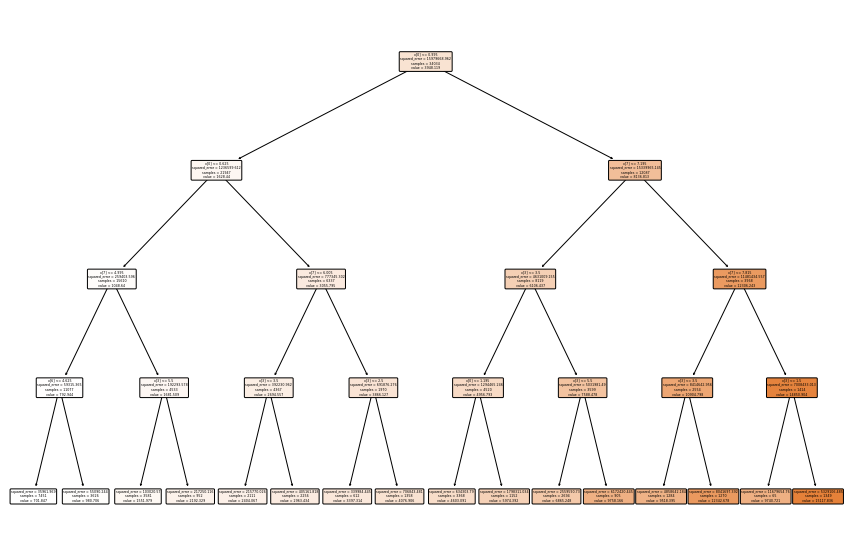

In [ ]:
rand_forrest = RandomForestRegressor(n_estimators=50, max_depth=4, 
                                                       max_features=10)
rand_forrest.fit(diamonds, price)
fig = plt.figure(figsize=(15, 10))
plot_tree(rand_forrest.estimators_[0],  
          filled=True, impurity=True, 
          rounded=True)

In [ ]:
best_forrest = RandomForestRegressor(n_estimators=50, max_depth=10, 
                                     max_features=10, oob_score=True)

for_train_rsme, for_test_rsme, for_oob_score, for_r2_score = cv_rsme(diamond_forest, diamonds, price)
print(f'Avg Train Rand. Forest RMSE: ', for_train_rsme)
print(f'Avg Test Rand. Forest RMSE: ', for_test_rsme)
print(f'Avg out-of-bag score: ', for_oob_score)
print(f'Average r2:', for_r2_score)



Avg Train Rand. Forest RMSE:  479.4966690396558
Avg Test Rand. Forest RMSE:  800.5640089543429
Avg out-of-bag score:  0.9802372853005336
Average r2: 0.5079665739351269


# 3.3.5 LightGBM, CatBoost and Bayesian Optimization

In [ ]:
!git clone --recursive https://github.com/Microsoft/LightGBM
%cd LightGBM
!mkdir build
%cd build
!cmake ../../LightGBM
!make -j4
! git clone --recursive https://github.com/Microsoft/LightGBM
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;
%cd LightGBM/python-package
!python3 setup.py install --gpu
!pip install cmake

In [ ]:
!pip install catboost

In [ ]:
!pip install scikit-optimize

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diamonds, price, train_size=0.75, test_size=.25, random_state=0)

opt = BayesSearchCV(
    CatBoostRegressor(),
    {
        'depth': [4, 6, 10],
        'learning_rate': [0.03, 0.1], 
        'l2_leaf_reg': [5, 10]
    },
    cv=4,
    verbose=10
)
print(opt.total_iterations)

150


In [ ]:
opt.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
10:	learn: 1966.3438008	total: 297ms	remaining: 26.7s
11:	learn: 1853.8308539	total: 333ms	remaining: 27.4s
12:	learn: 1752.4747814	total: 357ms	remaining: 27.1s
13:	learn: 1655.3856406	total: 381ms	remaining: 26.9s
14:	learn: 1567.4723602	total: 405ms	remaining: 26.6s
15:	learn: 1483.1046442	total: 435ms	remaining: 26.8s
16:	learn: 1406.4898999	total: 460ms	remaining: 26.6s
17:	learn: 1333.1889142	total: 486ms	remaining: 26.5s
18:	learn: 1267.5510246	total: 510ms	remaining: 26.3s
19:	learn: 1207.3220317	total: 541ms	remaining: 26.5s
20:	learn: 1150.8051724	total: 565ms	remaining: 26.4s
21:	learn: 1099.8935207	total: 590ms	remaining: 26.2s
22:	learn: 1053.4697516	total: 615ms	remaining: 26.1s
23:	learn: 1010.0134275	total: 639ms	remaining: 26s
24:	learn: 971.4875414	total: 668ms	remaining: 26.1s
25:	learn: 935.3161681	total: 693ms	remaining: 26s
26:	learn: 900.9829714	total: 717ms	remaining: 25.8s
27:	learn: 871.2505093	total: 746ms	re

/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Streaming output truncated to the last 5000 lines.
7:	learn: 2329.8063659	total: 47ms	remaining: 5.83s
8:	learn: 2187.9348319	total: 53.4ms	remaining: 5.88s
9:	learn: 2058.3255644	total: 59.5ms	remaining: 5.89s
10:	learn: 1942.0093575	total: 65.5ms	remaining: 5.88s
11:	learn: 1832.2863639	total: 71.3ms	remaining: 5.87s
12:	learn: 1730.6935658	total: 77.2ms	remaining: 5.86s
13:	learn: 1640.3457135	total: 93.8ms	remaining: 6.6s
14:	learn: 1554.6600322	total: 102ms	remaining: 6.72s
15:	learn: 1476.6040416	total: 108ms	remaining: 6.66s
16:	learn: 1406.1459998	total: 114ms	remaining: 6.6s
17:	learn: 1339.6889842	total: 120ms	remaining: 6.55s
18:	learn: 1277.0095586	total: 126ms	remaining: 6.51s
19:	learn: 1221.2545745	total: 132ms	remaining: 6.47s
20:	learn: 1169.6866939	total: 138ms	remaining: 6.43s
21:	learn: 1126.7992352	total: 144ms	remaining: 6.41s
22:	learn: 1082.2164761	total: 150ms	remaining: 6.38s
23:	learn: 1041.2623365	total: 156ms	remaining: 6.34s
24:	learn: 1005.6011458	total: 

BayesSearchCV(cv=4,
              estimator=<catboost.core.CatBoostRegressor object at 0x7fa117122550>,
              search_spaces={'depth': [4, 6, 10], 'l2_leaf_reg': [5, 10],
                             'learning_rate': [0.03, 0.1]},
              verbose=10)

In [ ]:
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.9823007909612922
test score: 0.9825277008586653
best params: OrderedDict([('depth', 6), ('l2_leaf_reg', 7), ('learning_rate', 0.08348635236883853)])


In [ ]:
opt.best_params_

OrderedDict([('depth', 6),
             ('l2_leaf_reg', 7),
             ('learning_rate', 0.08348635236883853)])

In [ ]:
opt.optimizer_results_

[          fun: -0.9823007909612922
             x: [6, 7, 0.08348635236883853]
     func_vals: [-9.818e-01 -9.822e-01 ... -9.822e-01 -9.823e-01]
       x_iters: [[4, 8, 0.07804483998863287], [6, 6, 0.09071288868929164], [6, 8, 0.037087556745061416], [6, 10, 0.08419835862797559], [10, 9, 0.046713876721778375], [10, 10, 0.08442074660152732], [6, 9, 0.0758826375749194], [4, 5, 0.04171834914278447], [6, 7, 0.08569531484991513], [4, 9, 0.06508534379115655], [10, 5, 0.03], [6, 10, 0.07016666261251517], [6, 7, 0.08348635236883853], [10, 8, 0.09341279572906176], [6, 8, 0.0850371164570973], [6, 9, 0.1], [6, 9, 0.09572729320760787], [10, 6, 0.07279628681836937], [10, 9, 0.05244159855355062], [6, 9, 0.1], [6, 7, 0.1], [6, 8, 0.045403849898338414], [4, 10, 0.06367772097748706], [4, 6, 0.06346823266875729], [6, 5, 0.1], [6, 10, 0.1], [4, 5, 0.0937863454912504], [6, 7, 0.07479351760506414], [6, 8, 0.042870479646181986], [6, 10, 0.07258716842477689], [6, 9, 0.030742222738390695], [6, 7, 0.0656240873

In [ ]:
cat_model = CatBoostRegressor(
    depth = 6, 
    l2_leaf_reg = 7,
    learning_rate = 0.08348635236883853
)

In [ ]:
cat_train_rmse, cat_test_rmse = cv_rsme(cat_model, diamonds, price)

Streaming output truncated to the last 5000 lines.
0:	learn: 3452.1887789	total: 9.11ms	remaining: 9.1s
1:	learn: 3204.2917691	total: 17.2ms	remaining: 8.56s
2:	learn: 2973.9725392	total: 25ms	remaining: 8.3s
3:	learn: 2764.6181133	total: 32.9ms	remaining: 8.18s
4:	learn: 2576.8119495	total: 40.8ms	remaining: 8.11s
5:	learn: 2399.8760046	total: 48.8ms	remaining: 8.09s
6:	learn: 2241.5652566	total: 58.8ms	remaining: 8.34s
7:	learn: 2095.9043247	total: 66.4ms	remaining: 8.24s
8:	learn: 1964.5625849	total: 74.1ms	remaining: 8.16s
9:	learn: 1843.7300417	total: 82.3ms	remaining: 8.15s
10:	learn: 1734.0967285	total: 90.1ms	remaining: 8.1s
11:	learn: 1628.9952191	total: 101ms	remaining: 8.32s
12:	learn: 1534.8782430	total: 118ms	remaining: 8.98s
13:	learn: 1451.8348126	total: 126ms	remaining: 8.86s
14:	learn: 1374.9343515	total: 134ms	remaining: 8.79s
15:	learn: 1302.8325426	total: 142ms	remaining: 8.71s
16:	learn: 1240.3196784	total: 150ms	remaining: 8.67s
17:	learn: 1181.7301400	total: 158m

In [ ]:
print(f'Avg Train CatBoost RMSE): ', cat_train_rmse)
print(f'Avg Test CatBoost RMSE): ', cat_test_rmse)

Avg Train CatBoost RMSE):  437.0101442593449
Avg Test CatBoost RMSE):  555.1115449018358


cont


In [ ]:
opt = BayesSearchCV(
    CatBoostRegressor(),
    {
        'num_trees': [25, 50, 75],
        'depth': [4, 6, 10],
        'learning_rate': [0.1,0.25], 
        'l2_leaf_reg': [0.03, 0.5]
    },
    cv=10
)
_ = opt.fit(diamonds, price)

Streaming output truncated to the last 5000 lines.
0:	learn: 3793.2477811	total: 9.63ms	remaining: 231ms
1:	learn: 3450.6974829	total: 18.3ms	remaining: 210ms
2:	learn: 3150.0161443	total: 24.9ms	remaining: 183ms
3:	learn: 2874.9514802	total: 31.2ms	remaining: 164ms
4:	learn: 2632.1175154	total: 37.2ms	remaining: 149ms
5:	learn: 2419.4563607	total: 43.5ms	remaining: 138ms
6:	learn: 2236.6485499	total: 49.5ms	remaining: 127ms
7:	learn: 2062.6551965	total: 56ms	remaining: 119ms
8:	learn: 1907.1621486	total: 62ms	remaining: 110ms
9:	learn: 1768.2554981	total: 68.3ms	remaining: 102ms
10:	learn: 1646.7678333	total: 75.3ms	remaining: 95.8ms
11:	learn: 1543.9223890	total: 81.7ms	remaining: 88.5ms
12:	learn: 1453.3744637	total: 87.8ms	remaining: 81ms
13:	learn: 1367.3895237	total: 94.2ms	remaining: 74ms
14:	learn: 1293.0168667	total: 101ms	remaining: 67.1ms
15:	learn: 1222.3286993	total: 107ms	remaining: 60.2ms
16:	learn: 1164.8921137	total: 113ms	remaining: 53.2ms
17:	learn: 1112.9843725	tota

/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


0:	learn: 3797.0050733	total: 90.2ms	remaining: 6.67s
1:	learn: 3453.9489211	total: 372ms	remaining: 13.6s
2:	learn: 3137.2396433	total: 2.49s	remaining: 59.7s
3:	learn: 2852.6708315	total: 4.26s	remaining: 1m 15s
4:	learn: 2597.4033863	total: 6.01s	remaining: 1m 24s
5:	learn: 2371.4311741	total: 7.82s	remaining: 1m 29s
6:	learn: 2166.7969507	total: 9.6s	remaining: 1m 33s
7:	learn: 1981.4343035	total: 9.67s	remaining: 1m 20s
8:	learn: 1817.8310804	total: 11.6s	remaining: 1m 24s
9:	learn: 1667.4782882	total: 14.3s	remaining: 1m 32s
10:	learn: 1534.7638115	total: 16s	remaining: 1m 33s
11:	learn: 1415.8008377	total: 17.8s	remaining: 1m 33s
12:	learn: 1310.3986057	total: 19.6s	remaining: 1m 33s
13:	learn: 1217.5357606	total: 21.3s	remaining: 1m 32s
14:	learn: 1130.7865359	total: 23.1s	remaining: 1m 32s
15:	learn: 1056.0546408	total: 25.6s	remaining: 1m 34s
16:	learn: 989.5894464	total: 27.7s	remaining: 1m 34s
17:	learn: 933.4306167	total: 27.8s	remaining: 1m 27s
18:	learn: 881.1057044	tota

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-77-aa21b9d4b9e2>", line 10, in <module>
    _ = opt.fit(diamonds, price)
  File "/usr/local/lib/python3.9/dist-packages/skopt/searchcv.py", line 466, in fit
    super().fit(X=X, y=y, groups=groups, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.9/dist-packages/skopt/searchcv.py", line 512, in _run_search
    optim_result = self._step(
  File "/usr/local/lib/python3.9/dist-packages/skopt/searchcv.py", line 408, in _step
    all_results = evaluate_candidates(params_dict)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.

KeyboardInterrupt: ignored

In [ ]:
_.best_params_

OrderedDict([('depth', 10),
             ('learning_rate', 0.19819204510645583),
             ('num_trees', 50)])

In [ ]:
_.optimizer_results_

[          fun: -0.7146435248096331
             x: [10, 0.19819204510645583, 50]
     func_vals: [ 1.386e+01 -7.017e-01 ... -5.358e-01 -5.169e-01]
       x_iters: [[5, 0.1978532898804481, 5], [10, 0.13771754339463166, 50], [2, 0.23786288559276425, 50], [5, 0.13965110573969824, 5], [2, 0.22804827758906418, 50], [5, 0.17725542953035409, 50], [10, 0.22472959008661686, 25], [5, 0.22507882767005039, 25], [5, 0.24297197324574682, 25], [2, 0.18747575730303928, 5], [10, 0.14418698225406668, 50], [5, 0.12993062594435495, 50], [10, 0.25, 5], [10, 0.1739464688470807, 50], [10, 0.15614143658403024, 50], [10, 0.1, 50], [10, 0.1, 25], [10, 0.25, 50], [10, 0.25, 25], [10, 0.25, 50], [10, 0.17909454945299916, 25], [10, 0.16983527657765973, 25], [10, 0.25, 25], [2, 0.15482600430805793, 25], [10, 0.22599354211298817, 50], [10, 0.20104540587799546, 50], [10, 0.12232867740627866, 25], [10, 0.1342036688628887, 25], [10, 0.1265964732868234, 50], [10, 0.25, 50], [5, 0.1, 50], [10, 0.1313572004898294, 25], [